<a href="https://colab.research.google.com/github/mvoassis/typing-corrector/blob/main/typing_corrector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple typing error corrector**

#### *Marcos V. O. Assis (mvoassis@gmail.com)*

***
> ## Objective: 

Generate an algorithm capable of correcting misspelled words.

> ## Language: 

For development and testing, words in Portuguese-BR were used.

> ## Approach:

1. Creation of a dictionary of correct words based on a dataset (Articles from the ALURA.com.br website)
2. Creation of generation of possible words for correction based on the errors considered.
3. Submission of the wrong word for correction
4. Selection of the generated word with the highest probability (frequency) of appearing in the dataset.

> ## Typing errors considered:

* Word with missing letter
* Word with extra letter
* Word with misspelled letter
* Word with swapped letters
* Word with errors in 2 levels


# Importing text file

In [ ]:
with open('artigos.txt','r') as f:
  articles = f.read()

print(articles[:500])




imagem 

Temos a seguinte classe que representa um usuário no nosso sistema:

java

Para salvar um novo usuário, várias validações são feitas, como por exemplo: Ver se o nome só contém letras, [**o CPF só números**] e ver se o usuário possui no mínimo 18 anos. Veja o método que faz essa validação:

java 

Suponha agora que eu tenha outra classe, a classe `Produto`, que contém um atributo nome e eu quero fazer a mesma validação que fiz para o nome do usuário: Ver se só contém letras. E aí? Vou


# Preprocessing

Number of words in the dataset

In [ ]:
# Performing initial split - list of tokens
tokens = articles.split() 

# Number of tokens
print('Number of tokens: ',len(tokens))

Number of tokens:  416903


In [ ]:
tokens[:5]

['imagem', 'Temos', 'a', 'seguinte', 'classe']

In [ ]:
# Same thing, but using nltk to sepparete signals as well..
#nltk = natural language tool kit 

import nltk
nltk.download('punkt')

token_list = nltk.tokenize.word_tokenize(articles)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Number of tokens
print('Number of tokens: ',len(token_list))

Number of tokens:  490772


In [ ]:
# returning only words, excluding non alphabetical symbols
def split_words(token_list):
  splitted_words = []
  for token in token_list:
    if(token.isalpha()):
      splitted_words.append(token)
  return splitted_words

In [ ]:
splitted_words = split_words(token_list)

In [ ]:
# Total Number of words
print('Number of words: ',len(splitted_words))

Number of words:  393914


In [ ]:
# Normalizing word list

def normalization(word_list):
  normalized_list = []
  for word in word_list:
    normalized_list.append(word.lower())
  return normalized_list

In [ ]:
norm_splitted_words = normalization(splitted_words)
norm_splitted_words[:5]

['imagem', 'temos', 'a', 'seguinte', 'classe']

In [ ]:
# Removing repeated values

set([1,2,3,3,4,5,5,6,6,6,7])

{1, 2, 3, 4, 5, 6, 7}

In [ ]:
unique_words = set(norm_splitted_words)

# Total Number of unique words
print('Number of Unique words: ',len(unique_words))

Number of Unique words:  17652


# Constructing the Corrector

## Inserting letters

In [ ]:
def insert_letters(slices):
  new_words = []
  letters = 'abcdefghihklmnopqrstuvxyzáâàãéêèẽíîìĩóôõòúûùũñç'
  for L, R in slices:   # left and right parts
    for letter in letters:
      new_words.append(L+letter+R)
  return new_words

def word_generator(word):
  slices = []
  for i in range(len(word)+1):
    slices.append((word[:i],word[i:]))
  generated_words = insert_letters(slices)
  return generated_words

#possible_words = word_generator(test)

In [ ]:
total_words = len(set(norm_splitted_words))     # Total number of words
frequency = nltk.FreqDist(norm_splitted_words)  # Frequency of each word
#print(frequency.most_common(10))               # printing top 10 most frequent word

# Return the probability of a word
def probability(generated_word):
  return frequency[generated_word]/total_words

# Return the word with highest probability of correctness
def corrector(word):
  generated_words = word_generator(word)
  correct_word = max(generated_words, key=probability)
  return correct_word

In [ ]:
# Testing the methods

test = 'lgica'

corrector(test)

'lógica'

## Removing letters

In [ ]:
def deleting_letters(slices):
  new_words = []
  for L, R in slices:   # left and right parts
    new_words.append(L+R[1:])
  return new_words

In [ ]:
# Reimplementing word generation function to include deleting_letters function

def word_generator2(word):
  slices = []
  for i in range(len(word)+1):
    slices.append((word[:i],word[i:]))
  generated_words = insert_letters(slices)
  generated_words += deleting_letters(slices)
  return generated_words

# Reimplementing corrector function

def corrector2(word):
  generated_words = word_generator2(word)
  correct_word = max(generated_words, key=probability)
  return correct_word

## Change letters

In [ ]:
def change_letters(slices):
  new_words = []
  letters = 'abcdefghihklmnopqrstuvxyzáâàãéêèẽíîìĩóôõòúûùũñç'
  for L, R in slices:   # left and right parts
    for letter in letters:
      new_words.append(L+letter+R[1:])
  return new_words

In [ ]:
# Reimplementing word generation function to include deleting_letters function

def word_generator3(word):
  slices = []
  for i in range(len(word)+1):
    slices.append((word[:i],word[i:]))
  generated_words = insert_letters(slices)
  generated_words += deleting_letters(slices)
  generated_words += change_letters(slices)
  return generated_words

# Reimplementing corrector function

def corrector3(word):
  generated_words = word_generator3(word)
  correct_word = max(generated_words, key=probability)
  return correct_word

## Swapping letters

In [ ]:
def swap_letters(slices):
  new_words = []
  for L, R in slices:   # left and right parts
    if len(R)>1:
      new_words.append(L+R[1]+R[0]+R[2:])
  return new_words

In [ ]:
# Reimplementing word generation function to include deleting_letters function

def word_generator4(word):
  slices = []
  for i in range(len(word)+1):
    slices.append((word[:i],word[i:]))
  generated_words = insert_letters(slices)
  generated_words += deleting_letters(slices)
  generated_words += change_letters(slices)
  generated_words += swap_letters(slices)
  return generated_words

# Reimplementing corrector function

def corrector4(word):
  generated_words = word_generator4(word)
  correct_word = max(generated_words, key=probability)
  return correct_word

## Boosted Word Generator

In [ ]:
# implementing a 2-layer depth word generation

def boosted_word_generator(generated_words):
  new_words = []
  for word in generated_words:
    new_words += word_generator4(word)
  return new_words

In [ ]:
# Reimplementing corrector function

def boosted_corrector(test_word, vocabulary):
  generated_words = word_generator4(test_word)
  boosted_words = boosted_word_generator(generated_words)
  all_words = set(generated_words+boosted_words)

  candidates = [test_word]
  for word in all_words:
    if word in vocabulary:
      candidates.append(word)

  correct_word = max(all_words, key=probability)
  return correct_word

# Testing 

## Loading test dataset

In [ ]:
# Loading test dataset
# txt file, each line containing the correct and mispelled word,
#sepparated by a single space.

def create_testset(file_name):
  list_testset = []
  f = open(file_name,'r')
  for line in f:
    correct, error = line.split()
    list_testset.append((correct,error))
  f.close()
  return list_testset

test_list = create_testset('palavras.txt')
test_list[:3]

[('podemos', 'pyodemos'), ('esse', 'esje'), ('já', 'jrá')]

## Test 1 - Including letters

In [ ]:
# Constructing the evaluation function for letter insertion

def evaluator(tests):
  number_of_words = len(tests)
  corrects = 0
  for correct, error in tests:
    corrected_word = corrector(error)
    if(corrected_word==correct):
      corrects+=1
  correct_rate = round((corrects / number_of_words)*100,2)
  print(f'Correctness rate: {correct_rate}% of {number_of_words} words.')
  return correct_rate

In [ ]:
# Testing letter insertion

t1 = evaluator(test_list)

Correctness rate: 1.08% of 186 words.


## Test 2 - Including and Excluding letters



In [ ]:
# Constructing the evaluation function for letter insertion and exclusion

def evaluator2(tests):
  number_of_words = len(tests)
  corrects = 0
  for correct, error in tests:
    corrected_word = corrector2(error)
    if(corrected_word==correct):
      corrects+=1
  correct_rate = round((corrects / number_of_words)*100,2)
  print(f'Correctness rate: {correct_rate}% of {number_of_words} words.')
  return correct_rate

In [ ]:
t2 = evaluator2(test_list)

Correctness rate: 41.4% of 186 words.


## Test 3 - Including, Excluding and Changing letters

In [ ]:
# Constructing the evaluation function for letter insertion, exclusion and changing

def evaluator3(tests):
  number_of_words = len(tests)
  corrects = 0
  for correct, error in tests:
    corrected_word = corrector3(error)
    if(corrected_word==correct):
      corrects+=1
  correct_rate = round((corrects / number_of_words)*100,2)
  print(f'Correctness rate: {correct_rate}% of {number_of_words} words.')
  return correct_rate

In [ ]:
t3 = evaluator3(test_list)

Correctness rate: 76.88% of 186 words.


## Test 4 - Including, Excluding, Changing and Swapping letters

In [ ]:
# Constructing the evaluation function for letter insertion, exclusion, changing and swapping

def evaluator4(tests):
  number_of_words = len(tests)
  corrects = 0
  for correct, error in tests:
    corrected_word = corrector4(error)
    if(corrected_word==correct):
      corrects+=1
  correct_rate = round((corrects / number_of_words)*100,2)
  print(f'Correctness rate: {correct_rate}% of {number_of_words} words.')
  return correct_rate

In [ ]:
t4 = evaluator4(test_list)

Correctness rate: 76.88% of 186 words.


## Test 4 

- Including, Excluding, Changing and Swapping letters
- Calculating unknown word rate

In [ ]:
# Constructing the evaluation function for letter insertion, exclusion, changing and swapping

def evaluator4(tests,vocabulary):
  number_of_words = len(tests)
  corrects = 0
  unknown = 0
  for correct, error in tests:
    corrected_word = corrector4(error)
    unknown += (correct not in vocabulary)
    if(corrected_word==correct):
      corrects+=1      
  
  correct_rate = round((corrects / number_of_words)*100,2)
  unknown_rate = round((unknown / number_of_words)*100,2)

  print(f'Correctness rate: {correct_rate}% of {number_of_words} words.')
  print(f'Unknown Word rate: {unknown_rate}% of {number_of_words} words.')
  return correct_rate

In [ ]:
vocabulary = set(norm_splitted_words)

t4 = evaluator4(test_list,vocabulary)

Correctness rate: 76.88% of 186 words.
Unknown Word rate: 6.99% of 186 words.


## Test 5 - Boosted corrector


In [ ]:
# Constructing the evaluation function for letter insertion, exclusion, changing and swapping

def evaluator5(tests,vocabulary):
  number_of_words = len(tests)
  corrects = 0
  unknown = 0
  for correct, error in tests:
    corrected_word = boosted_corrector(error,vocabulary)
    unknown += (correct not in vocabulary)
    if(corrected_word==correct):
      corrects+=1 
  #  else:
  #    print(correct + ": " + error + " - " + corrector4(error) + ' - ' + corrected_word)     

  correct_rate = round((corrects / number_of_words)*100,2)
  unknown_rate = round((unknown / number_of_words)*100,2)

  print(f'Correctness rate: {correct_rate}% of {number_of_words} words.')
  print(f'Unknown Word rate: {unknown_rate}% of {number_of_words} words.')
  return correct_rate

In [ ]:
vocabulary = set(norm_splitted_words)

t5 = evaluator5(test_list,vocabulary)

Correctness rate: 55.38% of 186 words.
Unknown Word rate: 6.99% of 186 words.


# Final Insights

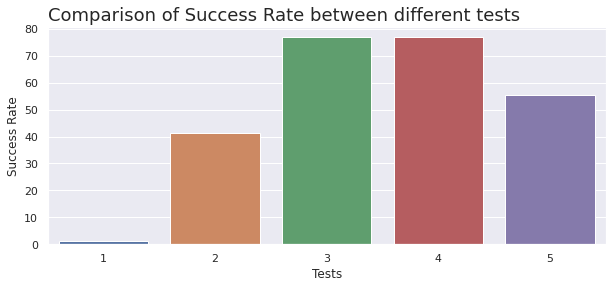

In [ ]:
from matplotlib import figure
import seaborn as sns
import pandas as pd
tests = [t1, t2, t3, t4, t5]
tests = pd.DataFrame(tests,columns=['Success_Rate'])

sns.set(rc = {'figure.figsize':(10,4)})
ax = sns.barplot(y = 'Success_Rate', x = tests.index, data=tests, errwidth=0)
ax.set_title('Comparison of Success Rate between different tests', fontsize=18, loc='left')
#ax.set_xticklabel(['Test 1','Test 2','Test 3','Test 4','Test 5','Test 6',])
ax.set_xlabel('Tests')
ax.set_ylabel('Success Rate')
ax.set_xticklabels(range(1,6))
ax = ax

**Tests 1 and 2**

As observed, the success rate increased considerably when implementing inclusion and exclusion characters together (Test 2), increasing more than 40% of the success rate, in comparison to the inclusion character function alone (Test 1). 

**Test 3**

Implementing the substitution of characters (Test 3) further incleased the success rate, achieving 76.88%.

**Test 4**

The character swapping (Test 4) did not change the results, probably because the training set does not present this type of mispelling.

**Test 5**

The implemented boosting function, which considers 2-level depth mispelling, achieved worse results compared to Test 4, achieving 55.38% of success rate. This is due the boosted function tends to select words with fewer characters, which are more common and, thus, appears more frequently on the dataset. The "max" function was used to select the corrected word (higher probability), which caused this behavior. 

**Unknown Words**

6.99% of the words present on the testset are not present in the training vocabulary.

**Further steps for improvement**


1.   Increase the training dataset to improve the classification; 
2.   Study another selection method besides the "max" function; 
3.   Test with a greater test dataset. 

